#### Importing the library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [7]:
# importing the data
d = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/heart.csv')
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### EDA Exploratory Data Analysis

In [8]:
pd.set_option("display.float","{:,.2f}".format)
d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<Axes: xlabel='target'>

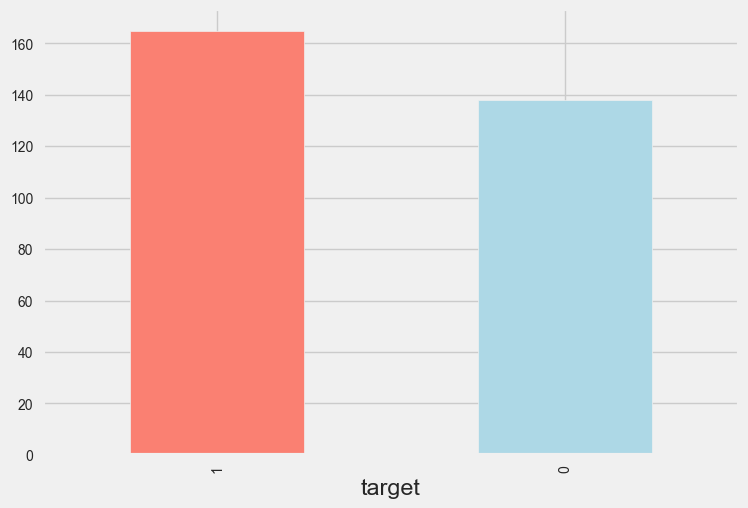

In [9]:
d.target.value_counts().plot(kind= 'bar', color= ['salmon','lightblue'])

In [10]:
# checking for missing value
d.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# defining the categorical and continous_val
categorical_val = []
continous_val = []
for column in d.columns:
    print('=======================')
    print(f"{column} : {d[column].unique()}")
    if len(d[column].unique()) <=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [12]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [13]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

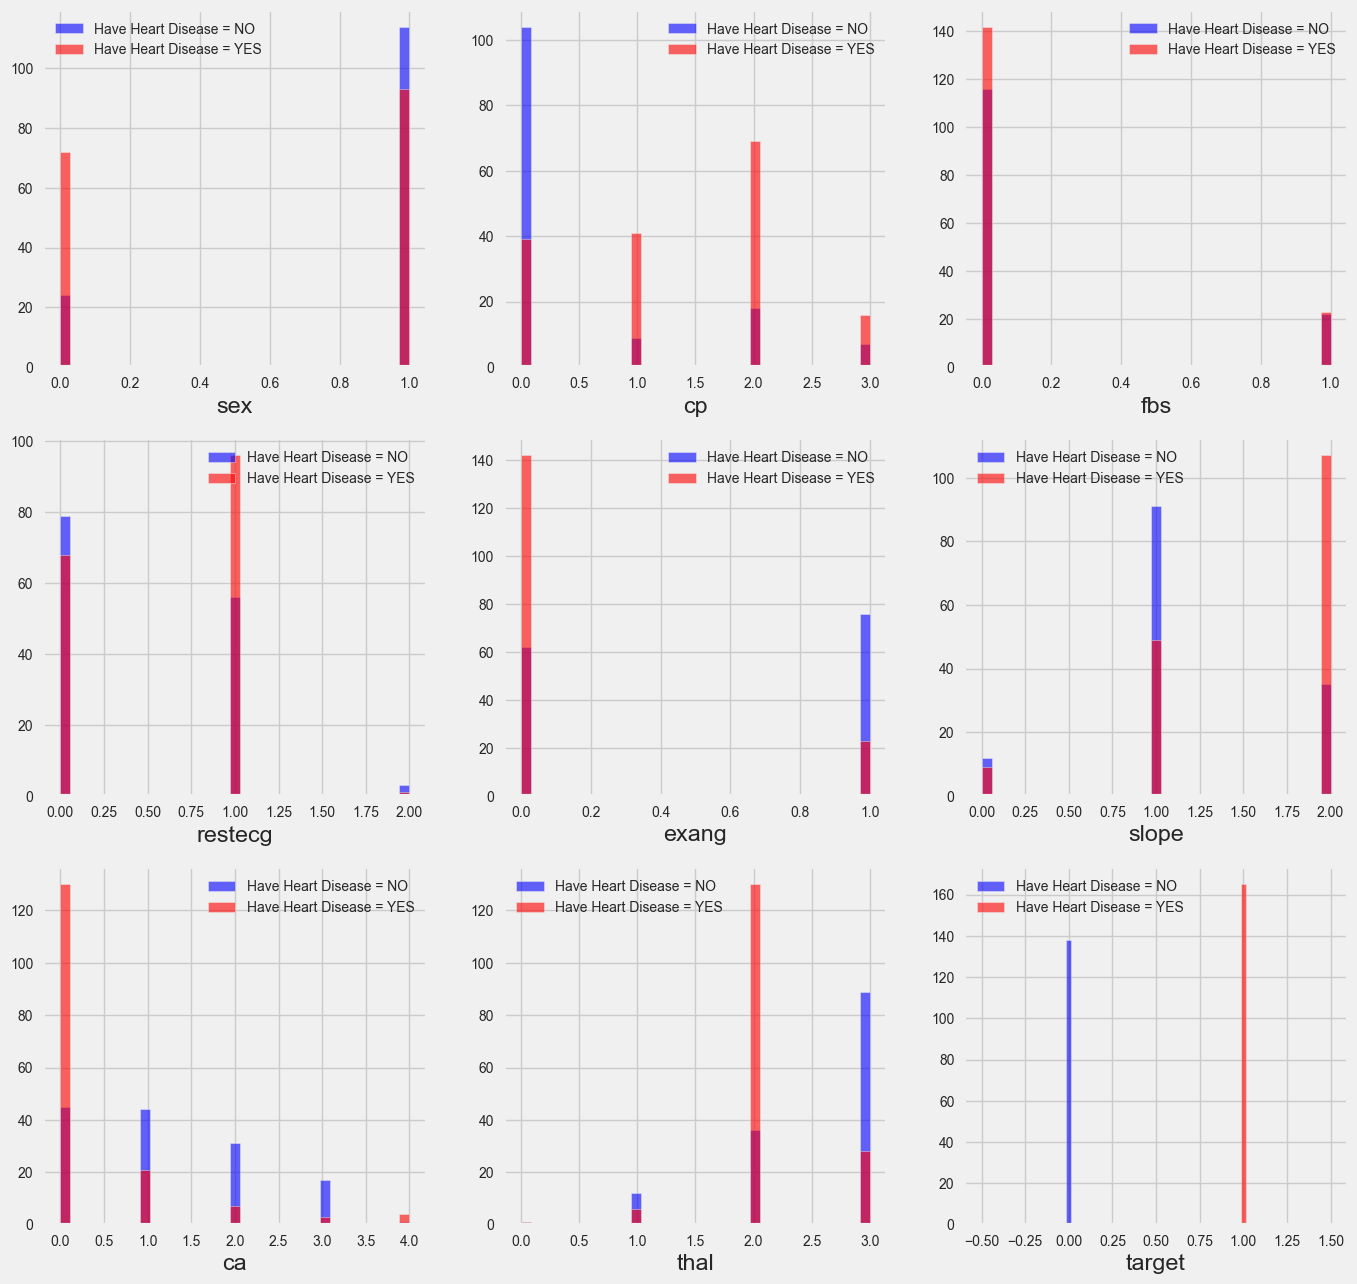

In [14]:
plt.figure(figsize=(15,15))

for i,column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    d[d['target'] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO',alpha=0.6)
    d[d['target'] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

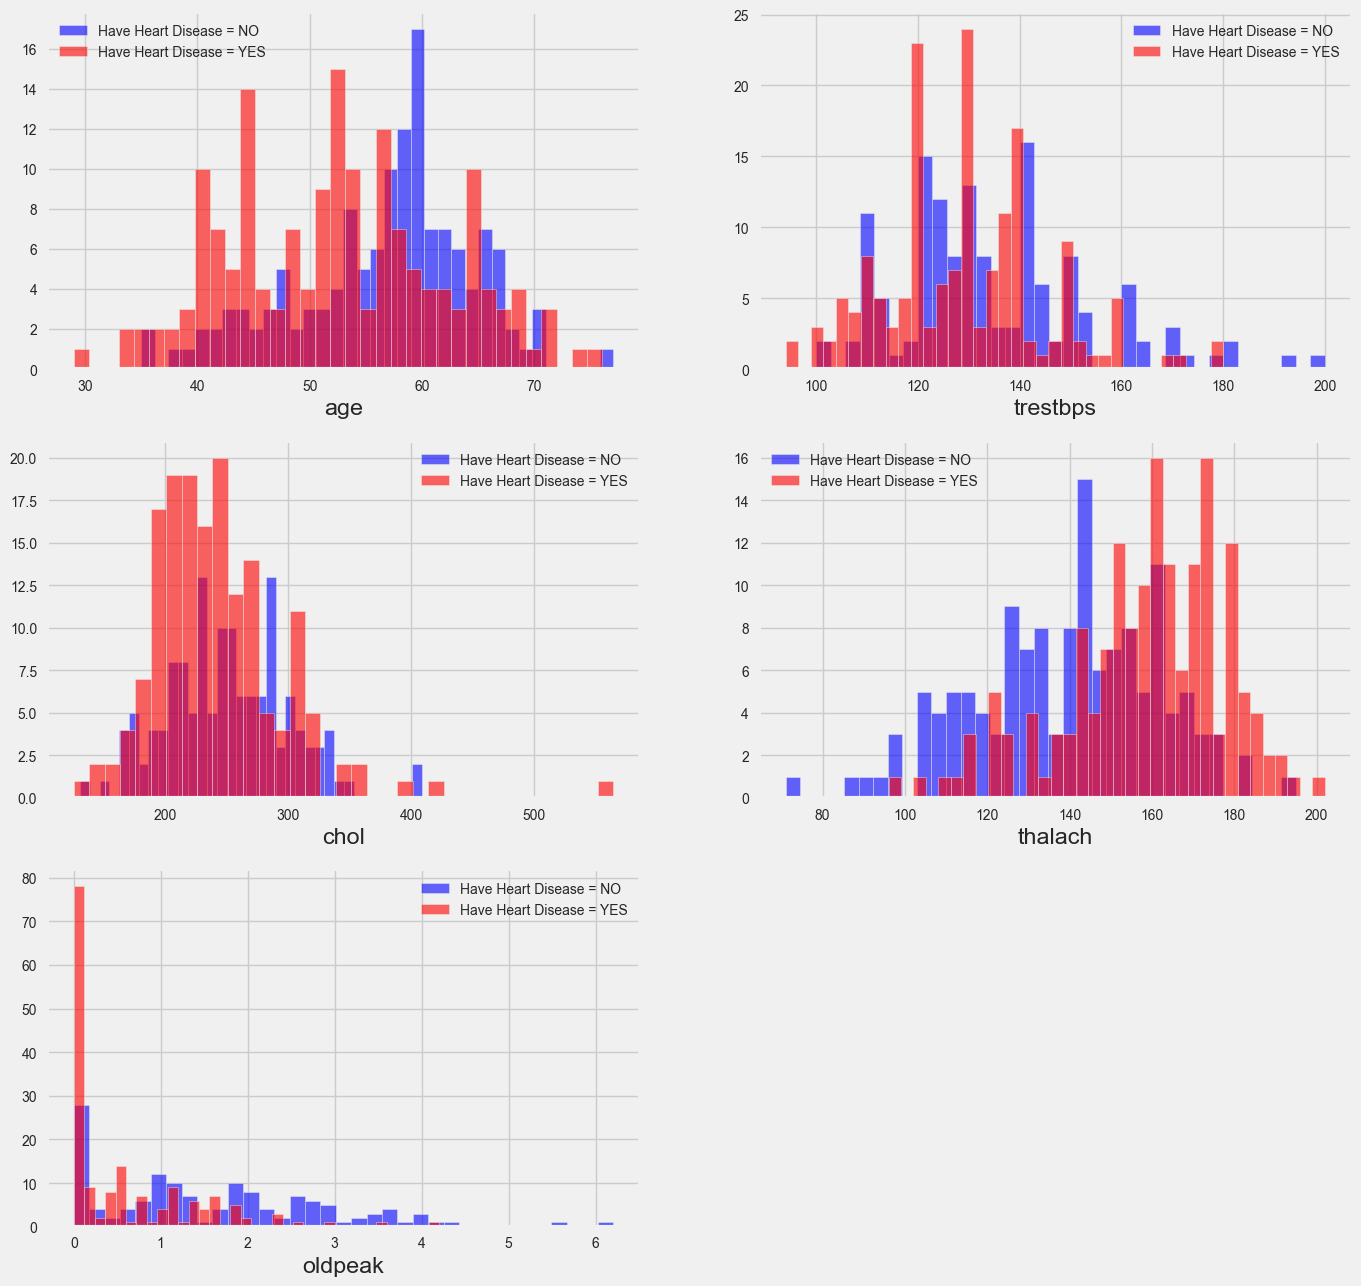

In [15]:
plt.figure(figsize=(15,15))

for i,column in enumerate(continous_val,1):
    plt.subplot(3,2,i)
    d[d['target'] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO',alpha=0.6)
    d[d['target'] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

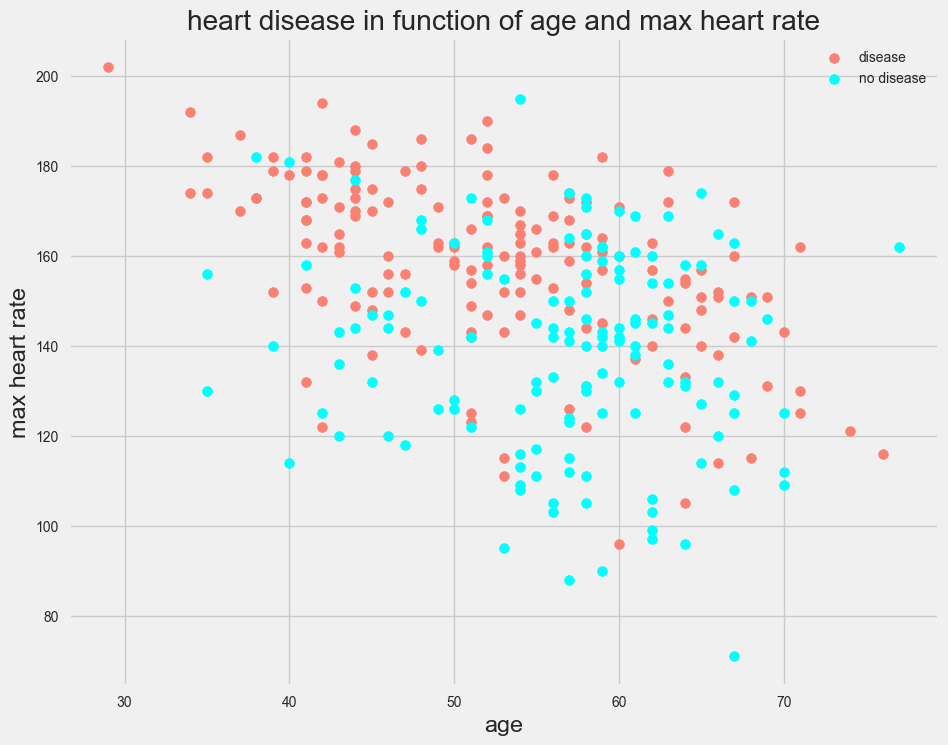

In [16]:
# create another figure
plt.figure(figsize=(10,8))

# scatter with +ve example
plt.scatter(d.age[d.target==1],
            d.thalach[d.target==1],
            c='salmon')

# scatter with -ve example
plt.scatter(d.age[d.target==0],
            d.thalach[d.target==0],
            color='cyan')

plt.title('heart disease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['disease','no disease'])

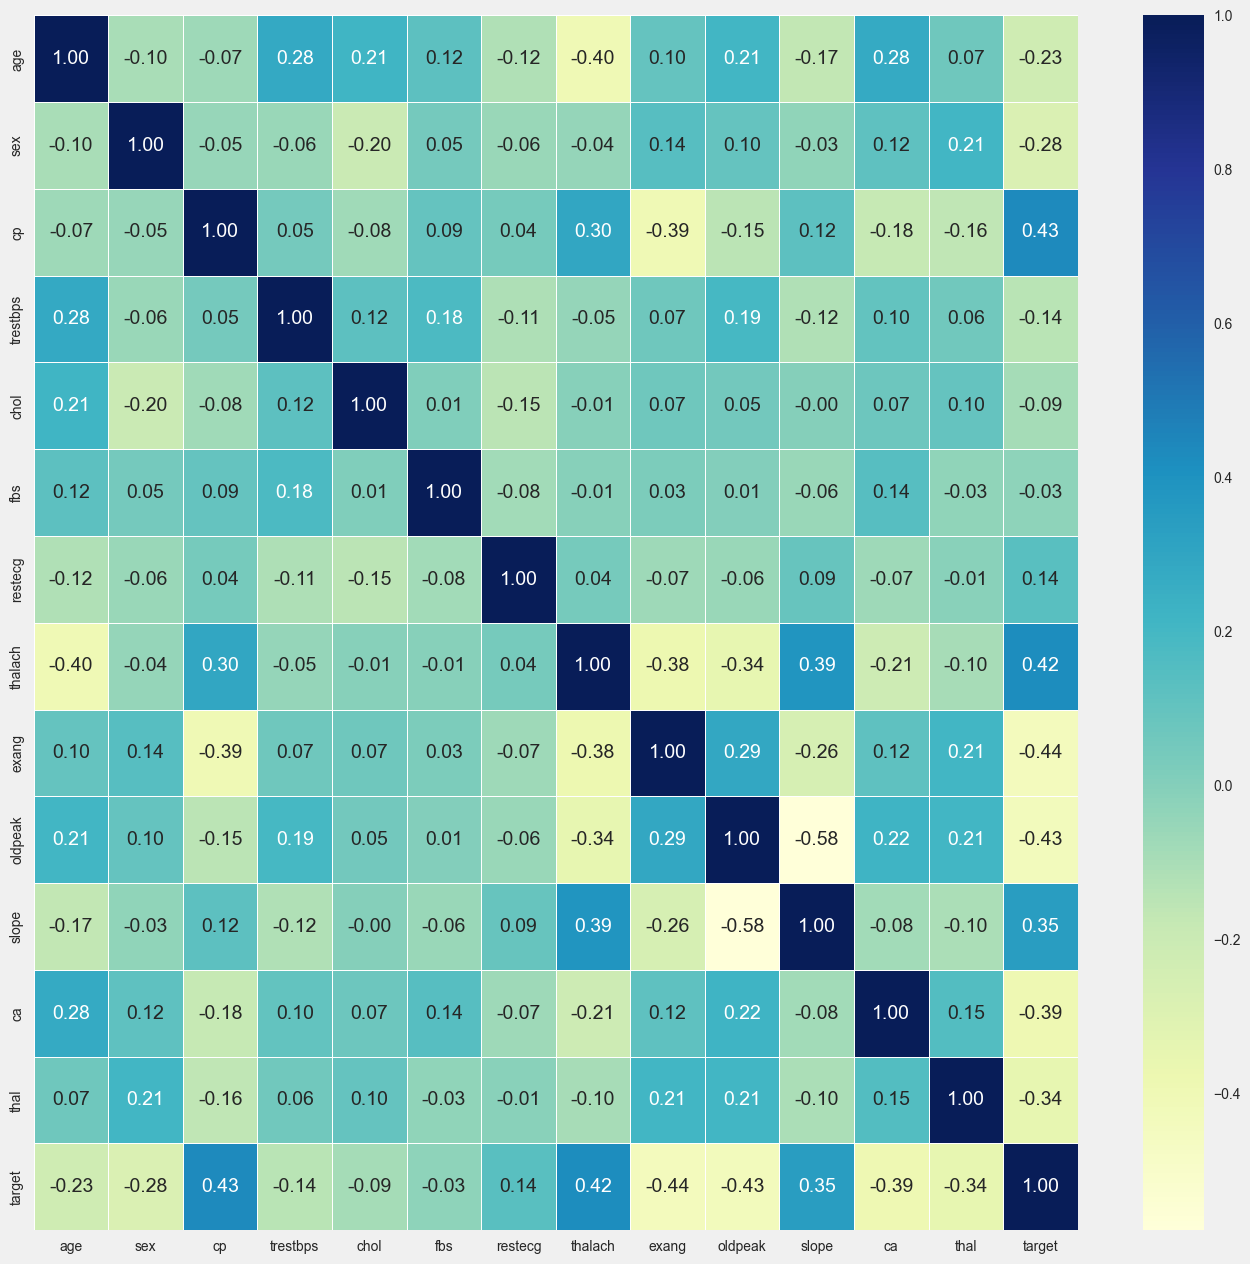

In [17]:
# Correlation Matrix
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

# bottom,top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5,top - 0.5)

<Axes: title={'center': 'correlation with target'}>

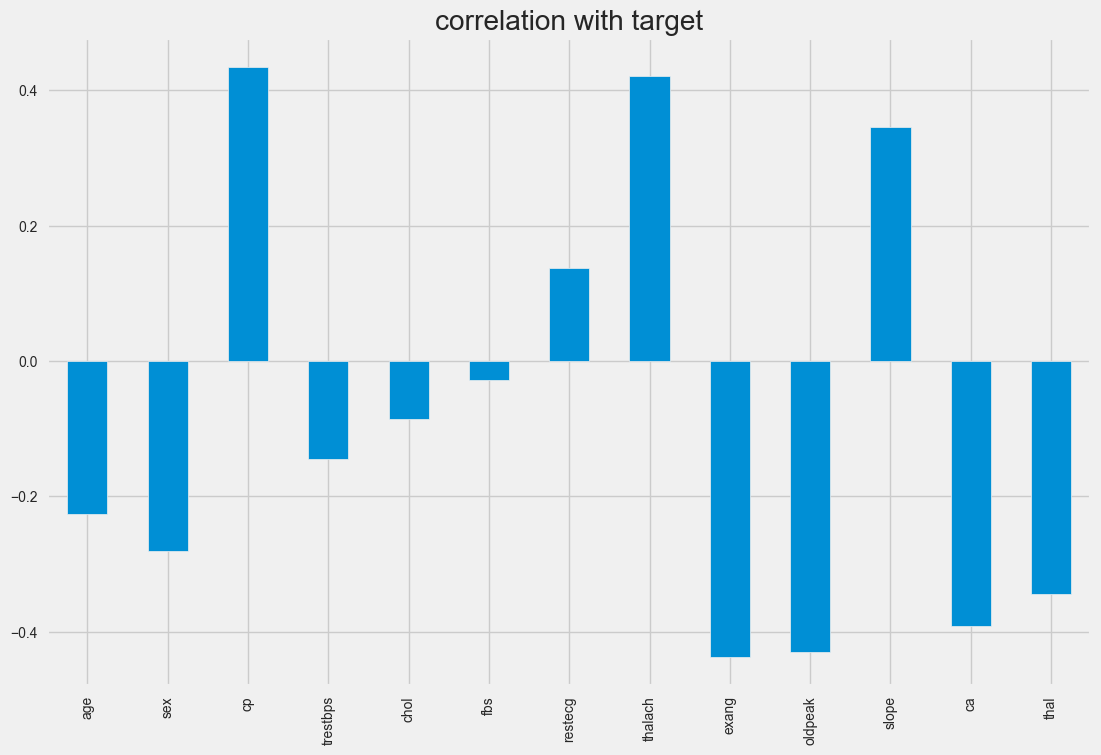

In [18]:
d.drop('target',axis=1).corrwith(d.target).plot(kind='bar',grid='True',figsize=(12,8),title="correlation with target")

#### Data Processing

In [19]:
categorical_val.remove('target')
dataset = pd.get_dummies(d,columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

#### Applying Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target',axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### Applying Random Forest

In [20]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target',axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

#### Accuracy

In [44]:
y_pred =lr_clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

print('MAE',mean_absolute_error(y_test,y_pred))
print('accuracy',accuracy_score(y_test,y_pred))

MAE 0.13186813186813187
accuracy 0.8681318681318682


In [46]:
y_pred =rf_clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

print('MAE for random forest',mean_absolute_error(y_test,y_pred))
print('accuracy for random forest',accuracy_score(y_test,y_pred))

MAE for random forest 0.16483516483516483
accuracy for random forest 0.8351648351648352


### 

In [24]:
# pip install pycaret

In [25]:
from pycaret.classification import *

In [26]:
exp_name = setup(data = d,  target = 'target')

,Description,Value
0,Session id,5922
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [27]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8539,0.9253,0.8955,0.8587,0.8706,0.7037,0.7171,0.0840
et,Extra Trees Classifier,0.8498,0.9145,0.8803,0.8494,0.8610,0.6982,0.7039,0.0990
lr,Logistic Regression,0.8494,0.9135,0.9053,0.8415,0.8683,0.6946,0.7045,1.2870
ridge,Ridge Classifier,0.8305,0.9171,0.9053,0.8131,0.8544,0.6549,0.6640,0.0280
lda,Linear Discriminant Analysis,0.8305,0.9162,0.9053,0.8131,0.8544,0.6549,0.6640,0.0270
nb,Naive Bayes,0.8258,0.8933,0.8606,0.8323,0.8437,0.6477,0.6517,0.0120
gbc,Gradient Boosting Classifier,0.8258,0.9036,0.8879,0.8147,0.8475,0.6449,0.6528,0.1100
lightgbm,Light Gradient Boosting Machine,0.8258,0.9096,0.8636,0.8326,0.8433,0.6485,0.6583,0.1030
ada,Ada Boost Classifier,0.8162,0.8641,0.8788,0.8049,0.8375,0.6264,0.6353,0.1020
qda,Quadratic Discriminant Analysis,0.8024,0.8838,0.8000,0.8359,0.8100,0.6040,0.6141,0.0150


C:\Users\Pc\Documents\python\python\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])
